<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/quests/EDAs/EDA_kaggle_air_quality_in_covid19_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 제안 : 공기 질 지표의 시간별 변화 분석
- 문제 정의: 2020년부터 2021년까지 시간에 따른 공기 질 지표(AQI)의 변화를 분석합니다.
- 배경: 이 분석을 통해 특정 시기에 공기 질이 악화되거나 개선되는 경향을 파악할 수 있습니다. 예를 들어, 계절적 변화나 특정 이벤트가 공기 질에 미치는 영향을 이해할 수 있습니다.


## 접근 : 공기 질 지표(Air Quality Index)의 정의
 + 개요 : 공기 질 지표는 기후를 측정하는 다양한 요소 중 미세먼지(PM10.0),초미세먼지(PM2.5),이산화질소(NO₂),오존(O₃),이산화황(SO₂),일산화탄소(CO)등의 농도를 측정하고 각 항목별 측정치 중에서 최대치인 값을, 각 항목별 AQI지수로 환산하여 지수를 측정한 다음 이 중 가장 높은 값을 해당 일의 공기 질 지표로 대체로 선정하는 방식이다.
 항목별 기준치는 아래와 같다.

### 일산화탄소 (CO)
 - 좋음: 0 ~ 4.4 ppm (AQI: 0 ~ 50)
 - 보통: 4.5 ~ 9.4 ppm (AQI: 51 ~ 100)
 - 민감군 영향: 9.5 ~ 12.4 ppm (AQI: 101 ~ 150)
 - 나쁨: 12.5 ~ 15.4 ppm (AQI: 151 ~ 200)
 - 매우 나쁨: 15.5 ~ 30.4 ppm (AQI: 201 ~ 300)
 - 위험: 30.5 ppm 이상 (AQI: 301 이상)

### 이산화질소 (NO2)
 - 좋음: 0 ~ 53 ppb (AQI: 0 ~ 50)
 - 보통: 54 ~ 100 ppb (AQI: 51 ~ 100)
 - 민감군 영향: 101 ~ 360 ppb (AQI: 101 ~ 150)
 - 나쁨: 361 ~ 649 ppb (AQI: 151 ~ 200)
 - 매우 나쁨: 650 ~ 1249 ppb (AQI: 201 ~ 300)
 - 위험: 1250 ppb 이상 (AQI: 301 이상)

### 오존 (O3)
 - 좋음: 0 ~ 54 ppb (AQI: 0 ~ 50)
 - 보통: 55 ~ 70 ppb (AQI: 51 ~ 100)
 - 민감군 영향: 71 ~ 85 ppb (AQI: 101 ~ 150)
 - 나쁨: 86 ~ 105 ppb (AQI: 151 ~ 200)
 - 매우 나쁨: 106 ~ 200 ppb (AQI: 201 ~ 300)
 - 위험: 201 ppb 이상 (AQI: 301 이상)

### 미세먼지 PM10
 - 좋음: 0 ~ 54 µg/m³ (AQI: 0 ~ 50)
 - 보통: 55 ~ 154 µg/m³ (AQI: 51 ~ 100)
 - 민감군 영향: 155 ~ 254 µg/m³ (AQI: 101 ~ 150)
 - 나쁨: 255 ~ 354 µg/m³ (AQI: 151 ~ 200)
 - 매우 나쁨: 355 ~ 424 µg/m³ (AQI: 201 ~ 300)
 - 위험: 425 µg/m³ 이상 (AQI: 301 이상)


###  미세먼지 PM2.5
 - 좋음: 0 ~ 12 µg/m³ (AQI: 0 ~ 50)
 - 보통: 12.1 ~ 35.4 µg/m³ (AQI: 51 ~ 100)
 - 민감군 영향: 35.5 ~ 55.4 µg/m³ (AQI: 101 ~ 150)
 - 나쁨: 55.5 ~ 150.4 µg/m³ (AQI: 151 ~ 200)
 - 매우 나쁨: 150.5 ~ 250.4 µg/m³ (AQI: 201 ~ 300)
 - 위험: 250.5 µg/m³ 이상 (AQI: 301 이상)

### 이산화황 (SO2)
 - 좋음: 0 ~ 35 ppb (AQI: 0 ~ 50)
 - 보통: 36 ~ 75 ppb (AQI: 51 ~ 100)
 - 민감군 영향: 76 ~ 185 ppb (AQI: 101 ~ 150)
 - 나쁨: 186 ~ 304 ppb (AQI: 151 ~ 200)
 - 매우 나쁨: 305 ~ 604 ppb (AQI: 201 ~ 300)
 - 위험: 605 ppb 이상 (AQI: 301 이상)

## 사전 작업

In [ ]:
# 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import matplotlib.font_manager as fm
# 설치된 폰트 중 'NanumGothic' 찾기
for font in fm.fontManager.ttflist:
    if 'NanumGothic' in font.name:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 대상 파일 로딩
df_BRAZIL= pd.read_csv('/content/BRAZIL.csv')
df_Canada= pd.read_csv('/content/Canada.csv')
df_FRANCE= pd.read_csv('/content/FRANCE.csv')
df_ITALY= pd.read_csv('/content/ITALY.csv')
df_India= pd.read_csv('/content/India.csv')
df_USA = pd.read_csv('/content/USA.csv')
df_BRAZIL.shape, df_Canada.shape, df_FRANCE.shape, df_ITALY.shape, df_India.shape, df_USA.shape

((10683, 9), (49221, 9), (81515, 9), (37986, 9), (79769, 9), (179365, 9))

In [3]:
# 대상 파일 병합 후, 양식에 맞게 연도표기 수정
df_AirConditions = pd.concat(objs=[df_BRAZIL, df_Canada, df_FRANCE, df_ITALY, df_India, df_USA])
df_AirConditions['Date']= pd.to_datetime(df_AirConditions['Date'],format ="%d-%m-%Y")
# 관리가 수월해 질 수 있도록 도시별로 일자 순서로 정렬
df_AirConditions_sorted = df_AirConditions.sort_values(by=['City','Date'])

In [4]:
# AQI의 계산을 위해 정렬된 파일을 이용하여 Specie 컬럼에 있는 계산에 필요한 항목을 추출하여 새로운 데이터 프레임을 생성
species = ['pm10', 'pm25', 'no2', 'o3', 'so2', 'co']
condition_1_2 = df_AirConditions_sorted[df_AirConditions_sorted['Specie'].isin(species)]
# 각 Specie 항목별 최대치(max) 값을 가져와서 항목별 값을 저장한 피봇 테이블을 생성
df_pivot_max = condition_1_2.pivot_table(values='max', index=['Country', 'City', 'Date'], columns='Specie').reset_index()
df_pivot_max

Specie,Country,City,Date,co,no2,o3,pm10,pm25,so2
0,BRAZIL,São José dos Campos,2020-12-28,2.8,21.5,28.5,26.0,85.0,NaN
1,BRAZIL,São José dos Campos,2020-12-29,2.8,16.5,34.6,30.0,59.0,NaN
2,BRAZIL,São José dos Campos,2020-12-30,2.8,19.7,32.5,33.0,55.0,NaN
3,BRAZIL,São José dos Campos,2020-12-31,3.7,18.8,26.9,35.0,74.0,NaN
4,BRAZIL,São José dos Campos,2021-01-01,3.7,13.8,27.3,50.0,95.0,NaN
...,...,...,...,...,...,...,...,...,...
43212,UNITED STATES,Washington D.C.,2021-12-03,5.8,30.6,24.1,NaN,42.0,0.6
43213,UNITED STATES,Washington D.C.,2021-12-04,4.7,33.4,27.2,NaN,61.0,1.5
43214,UNITED STATES,Washington D.C.,2021-12-05,5.5,28.8,30.4,NaN,56.0,0.7
43215,UNITED STATES,Washington D.C.,2021-12-06,6.5,34.3,30.4,NaN,64.0,0.6


In [5]:
# 각 항목 별 AQI를 도출하기 위한 기준치를 설정
pollutant_aqi_ranges = {
    'co': [  # 일산화탄소
        {'Cp_range': (0, 4.4), 'AQI_range': (0, 50)},
        {'Cp_range': (4.5, 9.4), 'AQI_range': (51, 100)},
        {'Cp_range': (9.5, 12.4), 'AQI_range': (101, 150)},
        {'Cp_range': (12.5, 15.4), 'AQI_range': (151, 200)},
        {'Cp_range': (15.5, 30.4), 'AQI_range': (201, 300)},
        {'Cp_range': (30.5, 40.4), 'AQI_range': (301, 400)},
        {'Cp_range': (40.5, 50.4), 'AQI_range': (401, 500)}
    ],
    'no2': [  # 이산화질소
        {'Cp_range': (0, 53), 'AQI_range': (0, 50)},
        {'Cp_range': (54, 100), 'AQI_range': (51, 100)},
        {'Cp_range': (101, 360), 'AQI_range': (101, 150)},
        {'Cp_range': (361, 649), 'AQI_range': (151, 200)},
        {'Cp_range': (650, 1249), 'AQI_range': (201, 300)},
        {'Cp_range': (1250, 1649), 'AQI_range': (301, 400)},
        {'Cp_range': (1650, 2049), 'AQI_range': (401, 500)}
    ],
    'o3': [  # 오존
        {'Cp_range': (0, 54), 'AQI_range': (0, 50)},
        {'Cp_range': (55, 70), 'AQI_range': (51, 100)},
        {'Cp_range': (71, 85), 'AQI_range': (101, 150)},
        {'Cp_range': (86, 105), 'AQI_range': (151, 200)},
        {'Cp_range': (106, 200), 'AQI_range': (201, 300)},
        {'Cp_range': (201, 604), 'AQI_range': (301, 500)}
    ],
    'pm10': [  # 미세먼지 PM10
        {'Cp_range': (0, 54), 'AQI_range': (0, 50)},
        {'Cp_range': (55, 154), 'AQI_range': (51, 100)},
        {'Cp_range': (155, 254), 'AQI_range': (101, 150)},
        {'Cp_range': (255, 354), 'AQI_range': (151, 200)},
        {'Cp_range': (355, 424), 'AQI_range': (201, 300)},
        {'Cp_range': (425, 504), 'AQI_range': (301, 400)},
        {'Cp_range': (505, 604), 'AQI_range': (401, 500)}
    ],
    'pm25': [  # 미세먼지 PM2.5
        {'Cp_range': (0, 12), 'AQI_range': (0, 50)},
        {'Cp_range': (12.1, 35.4), 'AQI_range': (51, 100)},
        {'Cp_range': (35.5, 55.4), 'AQI_range': (101, 150)},
        {'Cp_range': (55.5, 150.4), 'AQI_range': (151, 200)},
        {'Cp_range': (150.5, 250.4), 'AQI_range': (201, 300)},
        {'Cp_range': (250.5, 350.4), 'AQI_range': (301, 400)},
        {'Cp_range': (350.5, 500.4), 'AQI_range': (401, 500)}
    ],
    'so2': [  # 이산화황
        {'Cp_range': (0, 35), 'AQI_range': (0, 50)},
        {'Cp_range': (36, 75), 'AQI_range': (51, 100)},
        {'Cp_range': (76, 185), 'AQI_range': (101, 150)},
        {'Cp_range': (186, 304), 'AQI_range': (151, 200)},
        {'Cp_range': (305, 604), 'AQI_range': (201, 300)},
        {'Cp_range': (605, 804), 'AQI_range': (301, 400)},
        {'Cp_range': (805, 1004), 'AQI_range': (401, 500)}
    ]
}
# 위의 기준치를 인용하여, 반복적으로 계산할 Function 생성
# AQI = ((상한 AQI - 하한 AQI) / (상한 농도 - 하한 농도)) * (측정 농도 - 하한 농도) + 하한 AQI   <- AQI를 구하는 공식
def calculate_aqi(Cp, ranges):
    if pd.isnull(Cp): # 측정치가 없을 경우 생략하도록 지정
        return None
    for r in ranges:
        if r['Cp_range'][0] <= Cp <= r['Cp_range'][1]: # 수치를 대입 시켜  기준치의 최저값과 최고값의 위치를 찾는다
            Cp_low = r['Cp_range'][0]    # 농도의 최저값을 변수에 저장한다.
            Cp_high = r['Cp_range'][1]   # 농도의 최대값을 변수에 저장합ㄴ다.
            AQI_low = r['AQI_range'][0]  # AQI 최저값을 변수에 저장한다.
            AQI_high = r['AQI_range'][1] # AQI 최고값을 변수에 저장한다.
            AQI = ((AQI_high - AQI_low) / (Cp_high - Cp_low)) * (Cp - Cp_low) + AQI_low #AQI의 수치를 구하는 공식 적용
            return AQI
    return ranges[-1]['AQI_range'][1]  # 계산이 안 될 경우를 위해 범주의 최고치를 넘어갈 경우 최고치로 반영
# 일산화탄소에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 co_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['co_aqi'] = df_pivot_max['co'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['co']))
# 이산화질소에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 no2_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['no2_aqi'] = df_pivot_max['no2'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['no2']))
# 오존에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 o3_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['o3_aqi'] = df_pivot_max['o3'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['o3']))
# 미세먼지에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 pm10_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['pm10_aqi'] = df_pivot_max['pm10'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['pm10']))
# 초미세먼지에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 pm25_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['pm25_aqi'] = df_pivot_max['pm25'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['pm25']))
# 이산화황에 대한 AQI를 구하는 펑션을 동작시킨 후 이 값을 so2_AQI 컬럼을 생성하여 값을 채워 넣는다
df_pivot_max['so2_aqi'] = df_pivot_max['so2'].apply(lambda x: calculate_aqi(x, pollutant_aqi_ranges['so2']))
# 도출 된 각 항목별 AQI 수치 중에서 제일 높은 값을 대표 AQI로 선정해서 max_aqi 컬럼에 채워넣는다
df_pivot_max['max_aqi'] = df_pivot_max[['co_aqi', 'no2_aqi', 'o3_aqi', 'pm10_aqi', 'pm25_aqi', 'so2_aqi']].max(axis=1)
df_pivot_max

Specie,Country,City,Date,co,no2,o3,pm10,pm25,so2,co_aqi,no2_aqi,o3_aqi,pm10_aqi,pm25_aqi,so2_aqi,max_aqi
0,BRAZIL,São José dos Campos,2020-12-28,2.8,21.5,28.5,26.0,85.0,NaN,31.818182,20.283019,26.388889,24.074074,166.231823,NaN,166.231823
1,BRAZIL,São José dos Campos,2020-12-29,2.8,16.5,34.6,30.0,59.0,NaN,31.818182,15.566038,32.037037,27.777778,152.807165,NaN,152.807165
2,BRAZIL,São José dos Campos,2020-12-30,2.8,19.7,32.5,33.0,55.0,NaN,31.818182,18.584906,30.092593,30.555556,149.015075,NaN,149.015075
3,BRAZIL,São José dos Campos,2020-12-31,3.7,18.8,26.9,35.0,74.0,NaN,42.045455,17.735849,24.907407,32.407407,160.552160,NaN,160.552160
4,BRAZIL,São José dos Campos,2021-01-01,3.7,13.8,27.3,50.0,95.0,NaN,42.045455,13.018868,25.277778,46.296296,171.395153,NaN,171.395153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,UNITED STATES,Washington D.C.,2021-12-03,5.8,30.6,24.1,NaN,42.0,0.6,64.000000,28.867925,22.314815,NaN,117.005025,0.857143,117.005025
43213,UNITED STATES,Washington D.C.,2021-12-04,4.7,33.4,27.2,NaN,61.0,1.5,53.000000,31.509434,25.185185,NaN,153.839831,2.142857,153.839831
43214,UNITED STATES,Washington D.C.,2021-12-05,5.5,28.8,30.4,NaN,56.0,0.7,61.000000,27.169811,28.148148,NaN,151.258166,1.000000,151.258166
43215,UNITED STATES,Washington D.C.,2021-12-06,6.5,34.3,30.4,NaN,64.0,0.6,71.000000,32.358491,28.148148,NaN,155.388830,0.857143,155.388830


## 진행

In [6]:
# 계산이 편하도록 도시 별로 추출하는 피봇 테이블을 생성, 이 때 반복작업 시 저장이 용이하도록 딕셔너리 형태로 저장
max_pivot_tables = {}
for (country, city), group in df_pivot_max.groupby(['Country', 'City']):
    max_pivot_tables[f"df_pivot_max_{country}_{city}"] = group

In [7]:
# 계측치의 정보를 확인하기 위한 일종의 info 지표로 새로운 데이터프레임 생성
max_info_list = []
for key, df in max_pivot_tables.items():
    country = df['Country'].iloc[0] # 국가명을 입력하기 위해 Country 컬럼의 첫번째 값을 대표값으로 입력
    city = df['City'].iloc[0]     # 도시명을 입력하기 위해 City 컬럼의 첫번째 값을 대표값으로 입력
    non_null_counts = df.count()  # 각 열에 대해 존재하는 값의 개수를 계산
    info = {
        'Country': country,
        'City': city,
        'Date': non_null_counts['Date'],
        'co': non_null_counts['co'],
        'no2': non_null_counts['no2'],
        'o3': non_null_counts['o3'],
        'pm10': non_null_counts['pm10'],
        'pm25': non_null_counts['pm25'],
        'so2': non_null_counts['so2'],
        'co_aqi': non_null_counts['co_aqi'],
        'no2_aqi': non_null_counts['no2_aqi'],
        'o3_aqi': non_null_counts['o3_aqi'],
        'pm10_aqi': non_null_counts['pm10_aqi'],
        'pm25_aqi': non_null_counts['pm25_aqi'],
        'so2_aqi': non_null_counts['so2_aqi'],
        'max_aqi': non_null_counts['max_aqi']
    }
    max_info_list.append(info)

max_info_df = pd.DataFrame(max_info_list)
max_info_df.set_index(['Country', 'City'], inplace=True)
max_info_df


Date   co  no2   o3  pm10  pm25  so2  \
Country       City                                                        
BRAZIL        São José dos Campos   319  307  319  319   319    40  286   
              São Paulo             320  319  320  320   319   320  319   
              Vitória               312  300  307  300   299   244  296   
CA            Calgary               319  319  319  319     0   319   96   
              Edmonton              319  317  319  319     0   319  317   
...                                 ...  ...  ...  ...   ...   ...  ...   
UNITED STATES Staten Island         324  323  323  324     0   324  236   
              Tallahassee           324   50    0  322    42   324   33   
              The Bronx             324  320  164  324     0   320    0   
              Tucson                291  185  186  291   291   291  162   
              Washington D.C.       324  324  324  324     0   324  284   

                                   co_aqi  no2_aqi  o3_aqi  pm10_aqi  \
Country       City                                                     
BRAZIL        São José dos Campos     307      319     319       319   
              São Paulo               319      320     320       319   
              Vitória                 300      307     300       299   
CA            Calgary                 319      319     319         0   
              Edmonton                317      319     319         0   
...                                   ...      ...     ...       ...   
UNITED STATES Staten Island           323      323     324         0   
              Tallahassee              50        0     322        42   
              The Bronx               320      164     324         0   
              Tucson                  185      186     291       291   
              Washington D.C.         324      324     324         0   

                                   pm25_aqi  so2_aqi  max_aqi  
Country       City                                             
BRAZIL        São José dos Campos        40      286      319  
              São Paulo                 320      319      320  
              Vitória                   244      296      312  
CA            Calgary                   319       96      319  
              Edmonton                  319      317      319  
...                                     ...      ...      ...  
UNITED STATES Staten Island             324      236      324  
              Tallahassee               324       33      324  
              The Bronx                 320        0      324  
              Tucson                    291      162      291  
              Washington D.C.           324      284      324  

[136 rows x 14 columns]

In [8]:
# 생성된 국가 및 도시별 피봇 테이블 들을 확인
for name in max_pivot_tables.keys():
    print(name)

df_pivot_max_BRAZIL_São José dos Campos
df_pivot_max_BRAZIL_São Paulo
df_pivot_max_BRAZIL_Vitória
df_pivot_max_CA_Calgary
df_pivot_max_CA_Edmonton
df_pivot_max_CA_Halifax
df_pivot_max_CA_Hamilton
df_pivot_max_CA_Kitchener
df_pivot_max_CA_London
df_pivot_max_CA_Mississauga
df_pivot_max_CA_Montréal
df_pivot_max_CA_Ottawa
df_pivot_max_CA_Québec
df_pivot_max_CA_Surrey
df_pivot_max_CA_Toronto
df_pivot_max_CA_Vancouver
df_pivot_max_CA_Victoria
df_pivot_max_CA_Winnipeg
df_pivot_max_FRANCE_Amiens
df_pivot_max_FRANCE_Besançon
df_pivot_max_FRANCE_Bordeaux
df_pivot_max_FRANCE_Caen
df_pivot_max_FRANCE_Clermont-Ferrand
df_pivot_max_FRANCE_Dijon
df_pivot_max_FRANCE_Grenoble
df_pivot_max_FRANCE_Lille
df_pivot_max_FRANCE_Limoges
df_pivot_max_FRANCE_Lyon
df_pivot_max_FRANCE_Marseille
df_pivot_max_FRANCE_Metz
df_pivot_max_FRANCE_Montpellier
df_pivot_max_FRANCE_Nancy
df_pivot_max_FRANCE_Nantes
df_pivot_max_FRANCE_Nice
df_pivot_max_FRANCE_Nîmes
df_pivot_max_FRANCE_Orléans
df_pivot_max_FRANCE_Paris
df_pivo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 26979 to 27302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Country   324 non-null    object        
 1   City      324 non-null    object        
 2   Date      324 non-null    datetime64[ns]
 3   co        324 non-null    float64       
 4   no2       324 non-null    float64       
 5   o3        324 non-null    float64       
 6   pm10      0 non-null      float64       
 7   pm25      324 non-null    float64       
 8   so2       153 non-null    float64       
 9   co_aqi    324 non-null    float64       
 10  no2_aqi   324 non-null    float64       
 11  o3_aqi    324 non-null    float64       
 12  pm10_aqi  0 non-null      float64       
 13  pm25_aqi  324 non-null    float64       
 14  so2_aqi   153 non-null    float64       
 15  max_aqi   324 non-null    float64       
dtypes: datetime64[ns](1), float64(13), object(2)
memory usag

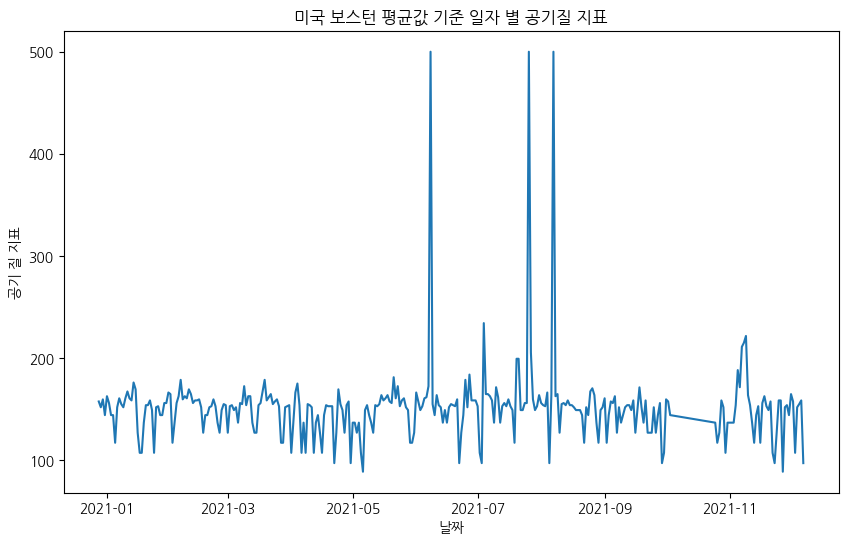

In [9]:
# 피봇 테이블에 있는 자료 중 하나를 선택하여 시각화 테스트
df_max_UNITED_STATES_Boston = max_pivot_tables['df_pivot_max_UNITED STATES_Boston']
df_max_UNITED_STATES_Boston.info()
plt.figure(figsize=(10,6))
plt.plot(df_max_UNITED_STATES_Boston['Date'], df_max_UNITED_STATES_Boston['max_aqi'])
plt.title('미국 보스턴 평균값 기준 일자 별 공기질 지표')
plt.xlabel('날짜')
plt.ylabel('공기 질 지표')
plt.show()

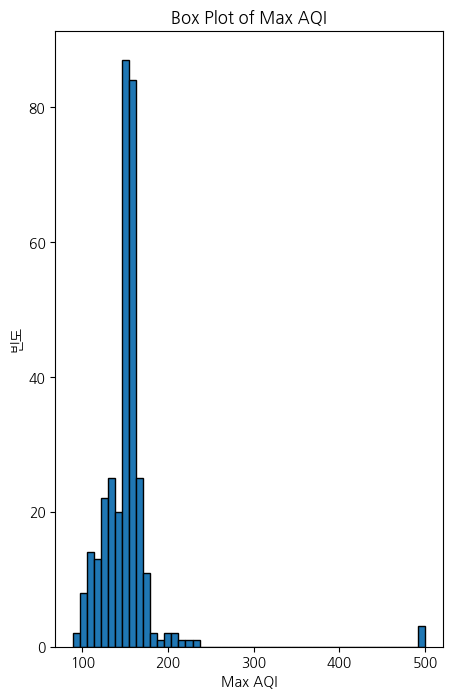

In [16]:
df_pivot_max_UNITED_STATES_Boston = max_pivot_tables['df_pivot_max_UNITED STATES_Boston']
plt.figure(figsize=(5, 8))
plt.hist(df_pivot_max_UNITED_STATES_Boston['max_aqi'], bins=50, edgecolor='black')
plt.xlabel('Max AQI')
plt.ylabel('빈도')
plt.title('Box Plot of Max AQI')
plt.show()

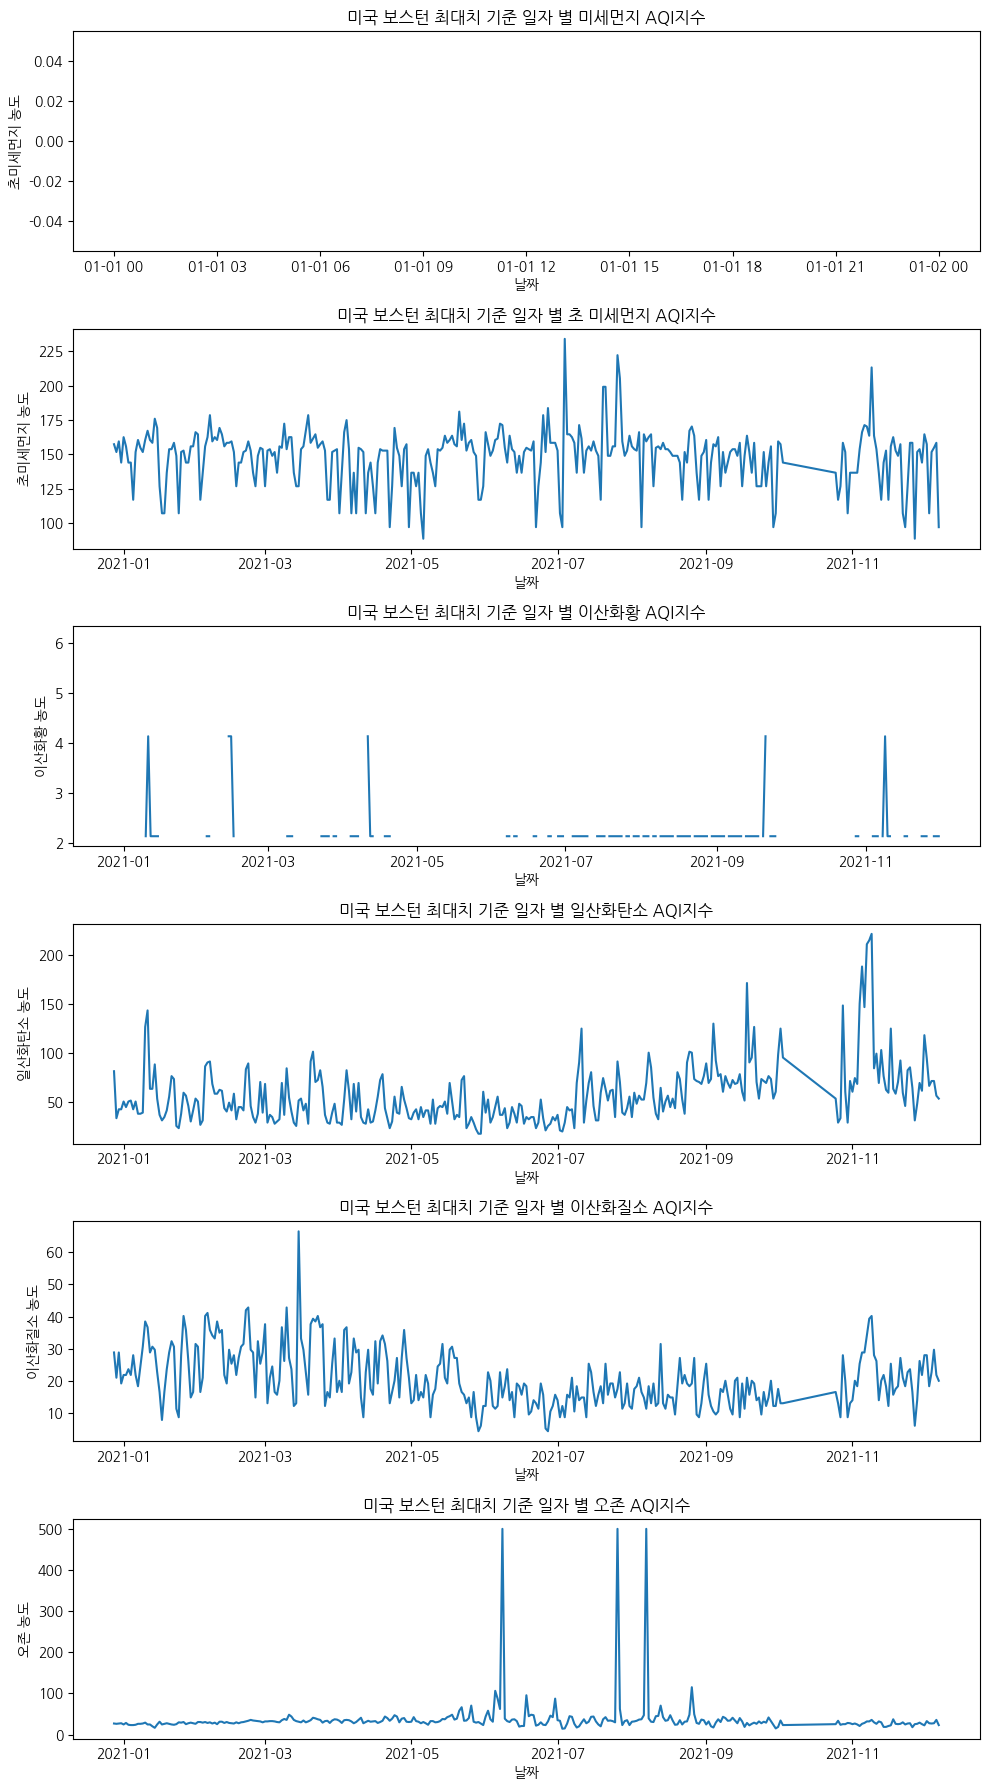

In [11]:
fig, axs = plt.subplots(6, figsize=(10,18))
# 'pm10 AQI' 그래프
axs[0].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['pm10_aqi'])
axs[0].set_title('미국 보스턴 최대치 기준 일자 별 미세먼지 AQI지수')
axs[0].set_ylabel('초미세먼지 농도')
# 'pm25 AQI' 그래프
axs[1].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['pm25_aqi'])
axs[1].set_title('미국 보스턴 최대치 기준 일자 별 초 미세먼지 AQI지수')
axs[1].set_ylabel('초미세먼지 농도')
# 'so2 AQI' 그래프
axs[2].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['so2_aqi'])
axs[2].set_title('미국 보스턴 최대치 기준 일자 별 이산화황 AQI지수')
axs[2].set_ylabel('이산화황 농도')
# 'co AQI' 그래프
axs[3].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['co_aqi'])
axs[3].set_title('미국 보스턴 최대치 기준 일자 별 일산화탄소 AQI지수')
axs[3].set_ylabel('일산화탄소 농도')
# 'no2 AQI' 그래프
axs[4].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['no2_aqi'])
axs[4].set_title('미국 보스턴 최대치 기준 일자 별 이산화질소 AQI지수')
axs[4].set_ylabel('이산화질소 농도')
# 'so2 AQI' 그래프
axs[5].plot(df_pivot_max_UNITED_STATES_Boston['Date'], df_pivot_max_UNITED_STATES_Boston['o3_aqi'])
axs[5].set_title('미국 보스턴 최대치 기준 일자 별 오존 AQI지수')
axs[5].set_ylabel('오존 농도')
# 모든 그래프에 대해 x축 레이블 설정
for ax in axs:
    ax.set_xlabel('날짜')

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()